In [9]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.lib import weights
import numpy as np
from shapely.geometry import Polygon

#### Contiguity weights

In [11]:
# Get points in a grid
l = np.arange(3)
xs, ys = np.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x + 1, y), (x + 1, y + 1), (x, y + 1)])
    polys.append(poly)
# Convert to GeoSeries
polys = gpd.GeoSeries(polys)
gdf = gpd.GeoDataFrame(
    {
        "geometry": polys,
        "id": ["P-%s" % str(i).zfill(2) for i in range(len(polys))],
    }
)
gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-00
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-01
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-02
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-03
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-04
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-05
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-06
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-07
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-08


<Axes: >

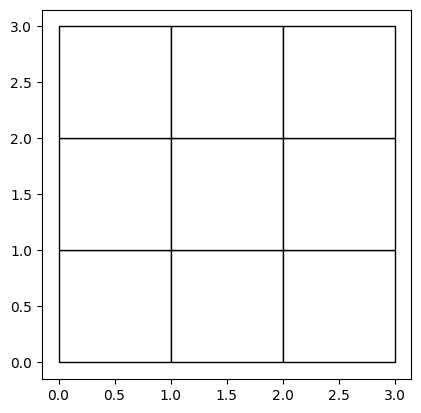

In [13]:
gdf.plot(facecolor="w", edgecolor="k")